In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.datasets import mnist
from keras.models import Model

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("Shape of the training data:", x_train.shape)
print("Shape of the testing data:", x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Shape of the training data: (60000, 28, 28)
Shape of the testing data: (10000, 28, 28)


In [19]:
class SimpleAutoencoder(tf.keras.Model):
    def __init__(self,latent_dimensions , data_shape):
        super(SimpleAutoencoder, self).__init__()
        self.latent_dimensions = latent_dimensions
        self.data_shape = data_shape
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dimensions, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(tf.math.reduce_prod(data_shape), activation='sigmoid'),
            layers.Reshape(data_shape)
        ])
    def call(self, input_data):
        encoded_data = self.encoder(input_data)
        decoded_data = self.decoder(encoded_data)
        return decoded_data
input_data_shape = x_test.shape[1:]
latent_dimensions = 64
simple_autoencoder = SimpleAutoencoder(latent_dimensions, input_data_shape)
simple_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
simple_autoencoder.fit(x_train, x_train, epochs=1,shuffle=True,validation_data=(x_test, x_test))


1875/1875 [==============================] - 9s 4ms/step - loss: 0.0240 - val_loss: 0.0094


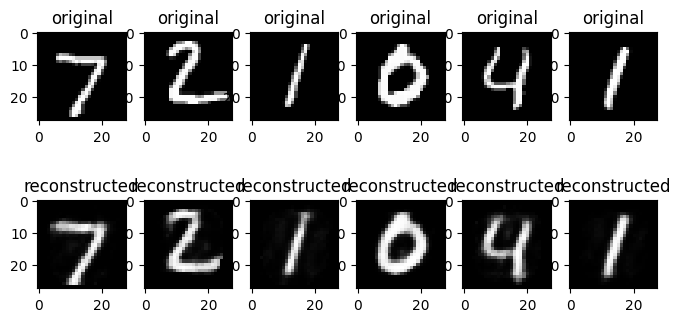

In [20]:
encoded_imgs = simple_autoencoder.encoder(x_test).numpy()
decoded_imgs = simple_autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(8, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()

plt.show()